------
### Metis: Project Fletcher 
>  Neha Gupta                
>  Date: 3/1/2019
-------

### Import Libraries

In [1]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker

__Creating a dataframe from saved csv__

df = pd.read_csv("../dataset/final_v1.csv")
print("Dataset has {} rows, {} columns.".format(*df.shape))

__Filtering the data__

In [4]:
#Keep selected features

cols_to_keep = [
    'description', 
    'property_type', 'room_type', 'accommodates',
    'bathrooms', 'bedrooms', 'beds', 'square_feet',
    'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
    'availability_365', 'reviews_per_month', 'bed_type','latitude','longitude'
]
df_airbnb = df[cols_to_keep]
print("Dataset has {} rows, {} columns.".format(*df_airbnb.shape))
# df_airbnb.head()

Dataset has 76551 rows, 18 columns.


__Cleaning unwanted fields__

In [5]:
# Clean numeric fields
num_feats = ['cleaning_fee', 'extra_people', 'price']
df_airbnb[num_feats] = df_airbnb[num_feats].replace('[\$,]', '', regex=True)
df_airbnb[num_feats] = df_airbnb[num_feats].apply(pd.to_numeric, errors='coerce')
print("Dataset has {} rows, {} columns.".format(*df_airbnb.shape))

Dataset has 76551 rows, 18 columns.


In [6]:
df_airbnb.describe()

,accommodates,bathrooms,bedrooms,beds,square_feet,price,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,reviews_per_month,latitude,longitude
count,76551.000000,76247.000000,76528.000000,76460.000000,1629.000000,76551.000000,67620.000000,76551.000000,76551.000000,7.655100e+04,76551.000000,67874.000000,76551.000000,76551.000000
mean,3.294810,1.333600,1.391817,1.810607,959.526703,216.945265,90.594528,1.779115,17.826599,1.699244e+04,145.870844,2.091601,37.764628,-122.431936
std,2.071273,0.937884,1.120892,1.342441,726.163413,320.057310,79.322745,1.405690,29.525844,1.303053e+06,131.370282,2.551522,0.022911,0.026720
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000,0.010000,37.704145,-122.513065
25%,2.000000,1.000000,1.000000,1.000000,401.000000,100.000000,40.000000,1.000000,0.000000,2.000000e+00,20.000000,0.470000,37.749632,-122.444196
50%,2.000000,1.000000,1.000000,1.000000,810.000000,150.000000,75.000000,1.000000,0.000000,3.000000e+00,101.000000,1.360000,37.764681,-122.426964
75%,4.000000,1.500000,2.000000,2.000000,1400.000000,250.000000,120.000000,2.000000,25.000000,7.000000e+00,280.000000,3.070000,37.783103,-122.412203
max,16.000000,15.000000,15.000000,15.000000,3000.000000,10000.000000,3000.000000,16.000000,300.000000,1.000000e+08,365.000000,138.300000,37.826416,-122.365222


__Distribution of availability_365__
__Focusing on house listing throughout year__

__Removing the listings which are part-time listing__

Dataset has 76551 rows, 18 columns.
Dataset has 31334 rows, 17 columns.


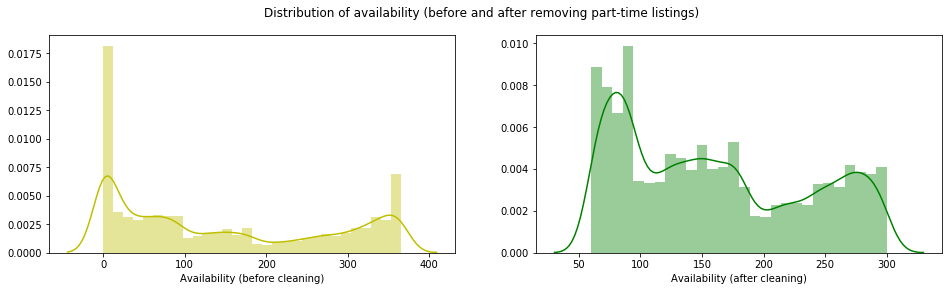

In [7]:
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of availability (before and after removing part-time listings)')

# Before cleaning
x_axis=df_airbnb['availability_365'].dropna()
sns.distplot(pd.Series(x_axis, name='Availability (before cleaning)'), ax=axs[0],color="y")

# Remove where availability less than 60 days or greater than 300 days
df_airbnb_noavailability = df_airbnb.query('60 <= availability_365 <= 300')
print("Dataset has {} rows, {} columns.".format(*df_airbnb.shape))

#After cleaning
x_axis=df_airbnb_noavailability['availability_365'].dropna()
sns.distplot(pd.Series(x_axis, name='Availability (after cleaning)'), ax=axs[1],color="g")
df_airbnb_noavailability = df_airbnb_noavailability.drop('availability_365', axis = 1)
print("Dataset has {} rows, {} columns.".format(*df_airbnb_noavailability.shape))

__Distribution of Max Guests__

__Remove where 'large listings > 10'__

You dropped 445 rows.
Dataset has 30889 rows, 17 columns.


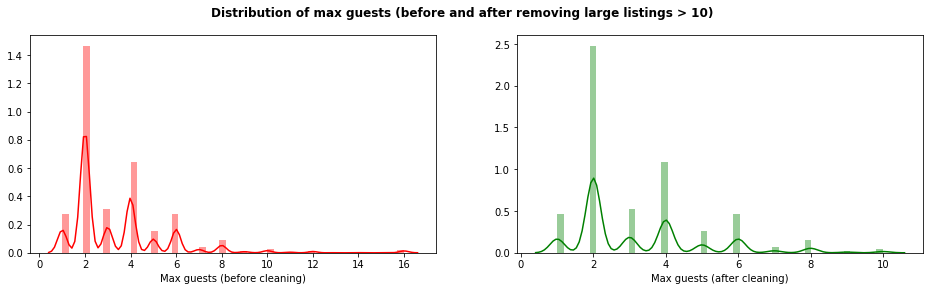

In [61]:
#Distribution of price
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of max guests (before and after removing large listings > 10)', weight='bold', fontsize=12)

# Before cleaning
x_axis=df_airbnb_noavailability['accommodates'].dropna()
sns.distplot(pd.Series(x_axis, name='Max guests (before cleaning)'), ax=axs[0],color="r")

# Remove where price > 1000
condition = df_airbnb_noavailability[df_airbnb_noavailability['accommodates'] > 10]
rows_to_drop = condition.index
print("You dropped {} rows.".format(condition.shape[0]))
df_airbnb_rmlargelisting = df_airbnb_noavailability.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*df_airbnb_rmlargelisting.shape))

#After cleaning
x_axis=df_airbnb_rmlargelisting['accommodates'].dropna()
sns.distplot(pd.Series(x_axis, name='Max guests (after cleaning)'), ax=axs[1],color="g")

__Distribution of price__

You dropped 230 rows.
Dataset has 30659 rows, 17 columns.


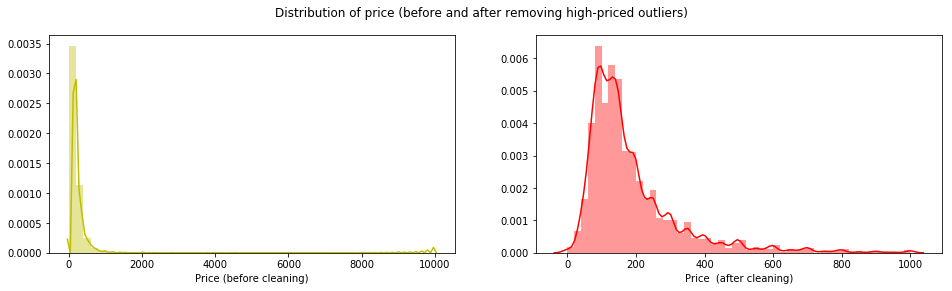

In [62]:
#Distribution of price
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of price (before and after removing high-priced outliers)')

# Before cleaning
x_axis=df_airbnb_rmlargelisting['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price (before cleaning)'), ax=axs[0],color="y")

# Remove where price > 1000
condition = df_airbnb_rmlargelisting[df_airbnb_rmlargelisting['price'] > 1000]
rows_to_drop = condition.index
print("You dropped {} rows.".format(condition.shape[0]))
df_airbnb_rmhighprice = df_airbnb_rmlargelisting.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*df_airbnb_rmhighprice.shape))

#After cleaning
x_axis=df_airbnb_rmhighprice['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price  (after cleaning)'), ax=axs[1],color="r")

__Checking Propert type and their counts__

In [63]:
df_airbnb_rmhighprice['property_type'].value_counts()

Apartment             12971
House                  9888
Condominium            2345
Guest suite            1924
Boutique hotel          557
Townhouse               479
Loft                    330
In-law                  328
Hostel                  299
Other                   262
Guesthouse              218
Bed and breakfast       203
Serviced apartment      196
Bed & Breakfast         186
Hotel                    89
Bungalow                 66
Aparthotel               59
Resort                   56
Timeshare                54
Dorm                     38
Cabin                    26
Cottage                  20
Villa                    15
Boat                     13
Tiny house               12
Floor                     7
Treehouse                 6
Vacation home             4
Camper/RV                 3
Castle                    2
Tent                      2
Cave                      1
Name: property_type, dtype: int64

In [64]:
categories_to_rename = ['Serviced apartment','Hotel','Bungalow','Aparthotel','Resort','Timeshare','Dorm','Cabin','Cottag','Villa','Boat','Tiny house','Floor','Treehouse','Vacation','home','Camper/RV','Tent','Castle','Cave',
                       'Cottage','Vacation home','Guesthouse','Hostel','In-law','Loft','Townhouse','Guest suite','Bed and breakfast', 'Bed & Breakfast']
df_airbnb_rmhighprice['property_type'].loc[df_airbnb_rmhighprice['property_type'].isin(categories_to_rename)] = 'Other'

In [65]:
df_airbnb_rmhighprice['property_type'].value_counts()

Apartment         12971
House              9888
Other              4898
Condominium        2345
Boutique hotel      557
Name: property_type, dtype: int64

__Checkimg Type of beda and their counts__

In [66]:
df_airbnb_rmhighprice['bed_type'].value_counts()

Real Bed         30185
Futon              191
Pull-out Sofa      173
Airbed              70
Couch               40
Name: bed_type, dtype: int64

In [67]:
categories_to_rename = ['Pull-out Sofa', 'Futon', 'Couch', 'Airbed']
df_airbnb_rmhighprice['bed_type'].loc[df_airbnb_rmhighprice['bed_type'].isin(categories_to_rename)] = 'Non-Real Bed'



In [68]:
df_airbnb_rmhighprice['bed_type'].value_counts()

Real Bed        30185
Non-Real Bed      474
Name: bed_type, dtype: int64

__Calculation of yield__
__Yield is defined as the amount of revenue that a property will earn over a year. This is calculated as follows:__

__AVERAGE LENGTH OF STAY X PRICE X NO. OF REVIEWS/MTH X REVIEW RATE X 12 MONTHS__


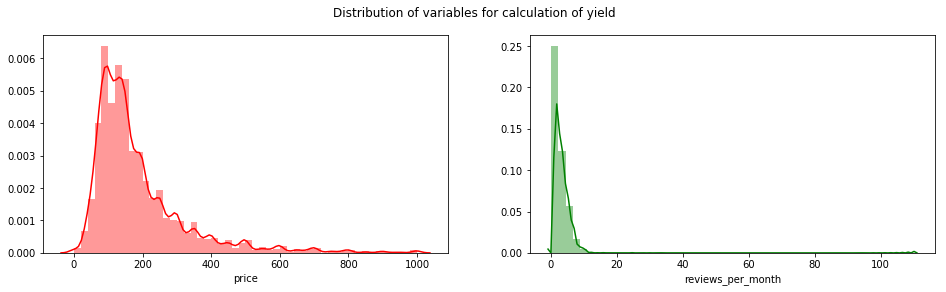

In [69]:
#Distribution of yield, availability_365, reviews_per_month
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of variables for calculation of yield')
x_axis=df_airbnb_rmhighprice['price'].dropna()
sns.distplot(pd.Series(x_axis, name=x_axis.name), ax=axs[0],color="r")
x_axis=df_airbnb_rmhighprice['reviews_per_month'].dropna()
sns.distplot(pd.Series(x_axis, name=x_axis.name), ax=axs[1],color="g")

In [70]:
# Calculate yield

# Average length of stay (by city) X Price ('price') X No. of reviews('reviews_per_month') / Review rate('50%')
avg_length_of_stay_san_francisco = 3
review_rate = 0.5
df_airbnb_rmhighprice['price'] = df_airbnb_rmhighprice['price'] + df_airbnb_rmhighprice['cleaning_fee']
df_airbnb_rmhighprice['yield'] = avg_length_of_stay_san_francisco * df_airbnb_rmhighprice['price'] * (df_airbnb_rmhighprice['reviews_per_month'] / review_rate) * 12

cols_to_drop = ['cleaning_fee']
df_airbnb_yield = df_airbnb_rmhighprice.drop(cols_to_drop, axis = 1)
print("Dataset has {} rows, {} columns.".format(*df_airbnb_yield.shape))

Dataset has 30659 rows, 17 columns.


In [71]:
# __Analysing the distributions for price, reviews and resulting yield makes intuitive sense. 
# The bulk of listings are less than $80/night probably for a private room, and receive 1-4 bookings a month for stays over the weekend. 
# This indicates occupancy rates of 10-50%, earning the average AirBnb host $15,739 per listing in a year, going up to $21,480 for upper quartile listings.



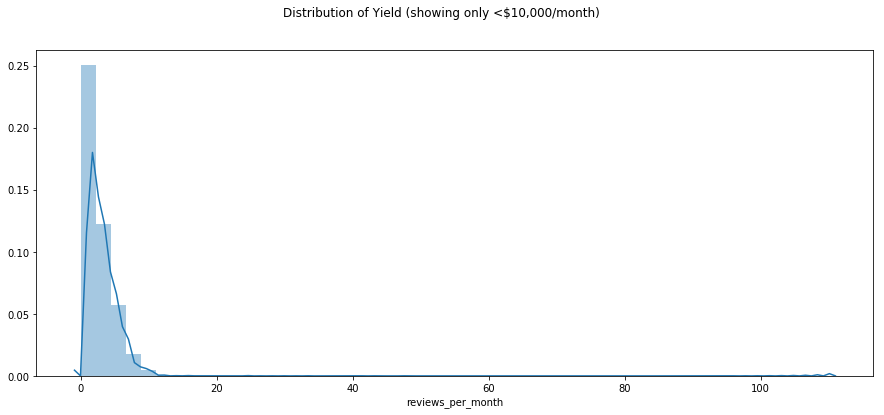

In [72]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,6))
fig.suptitle('Distribution of Yield (showing only <$10,000/month)')
x_axes = df_airbnb_yield['yield'].dropna()
x = pd.Series(x_axis, name=x_axis.name)
ax = sns.distplot(x) 

In [73]:
df_airbnb_yield.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30659 entries, 0 to 76550
Data columns (total 17 columns):
description          30615 non-null object
property_type        30659 non-null object
room_type            30659 non-null object
accommodates         30659 non-null int64
bathrooms            30571 non-null float64
bedrooms             30647 non-null float64
beds                 30623 non-null float64
square_feet          790 non-null float64
price                27441 non-null float64
guests_included      30659 non-null int64
extra_people         30659 non-null float64
minimum_nights       30659 non-null int64
reviews_per_month    27489 non-null float64
bed_type             30659 non-null object
latitude             30659 non-null float64
longitude            30659 non-null float64
yield                25125 non-null float64
dtypes: float64(10), int64(3), object(4)
memory usage: 4.2+ MB


In [74]:
# import gmplot
# # gmap = gmplot.GoogleMapPlotter.from_geocode("San Francisco")
# gmap = gmplot.GoogleMapPlotter(37.773972, -122.431297, 13)
# gmap.heatmap(df_airbnb_yield.latitude.values, df_airbnb_yield.longitude.values)
# gmap.draw("my_map.html")

In [75]:
# import networkx as nx
# Graphx= nx.Graph()
# Graphx = nx.from_pandas_edgelist(df_airbnb_yield,source='yield',target='room_type')
# print (nx.info(Graphx))
# plt.figure(figsize=(9,10)) 
# nx.draw(Graphx,alpha=0.5, node_color="blue",with_labels=False,node_size=35)
# plt.show()

In [76]:
# import pandas as pd
# import numpy as np
# import networkx as nx
# import matplotlib.pyplot as plt

# # Build your graph
# G = nx.from_pandas_edgelist(df_airbnb_yield, 'room_type','property_type')

# # Plot it
# nx.draw(G, with_labels=True)
# plt.show()

In [77]:
df_airbnb_yield['yield'].mean()

41759.812900298704

In [99]:
by_property_type = df_airbnb_yield.groupby('property_type', as_index=False)['yield'].mean().sort_values(by=['yield'])
by_property_type[by_property_type['property_type']!='Other']

,property_type,yield
1,Boutique hotel,26163.599124
0,Apartment,39376.280927
2,Condominium,40608.128724
3,House,42181.063303


<Figure size 864x576 with 0 Axes>

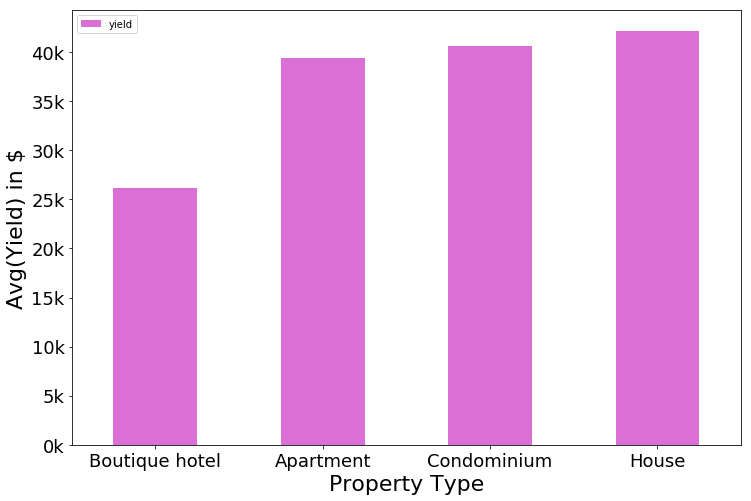

In [100]:
plt.figure(figsize=(12, 8))
plot = by_property_type[by_property_type['property_type']!='Other'].\
    plot.bar(x='property_type', rot=0,color='orchid')
fig = plot.get_figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111)
def y_fmt(x, y):
    x = int(x)//1000
    return '{}k'.format(x)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.xlabel('Property Type',fontsize=22)
plt.ylabel('Avg(Yield) in $', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fig.savefig("property_type.png")

<Figure size 720x432 with 0 Axes>

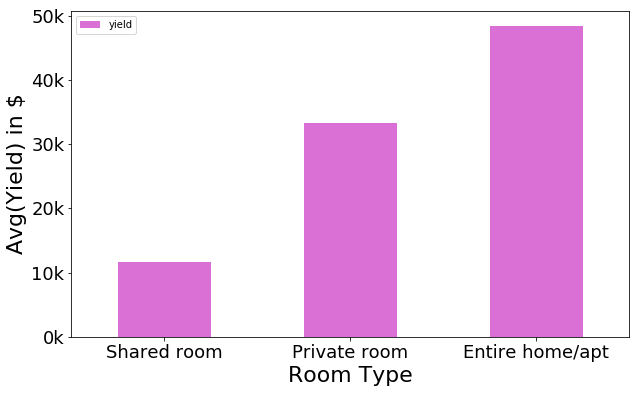

In [102]:
plt.figure(figsize=(10, 6))
plot = df_airbnb_yield.\
    groupby('room_type', as_index=False)['yield'].\
    mean().sort_values(by=['yield']).\
    plot.bar(x='room_type', rot=0,color='orchid')
fig = plot.get_figure()
fig.set_size_inches(10, 6)
ax = fig.add_subplot(111)
def y_fmt(x, y):
    x = int(x)//1000
    return '{}k'.format(x)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.xlabel('Room Type',fontsize=22)
plt.ylabel('Avg(Yield) in $', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fig.savefig("by_room_type.png")

<Figure size 720x432 with 0 Axes>

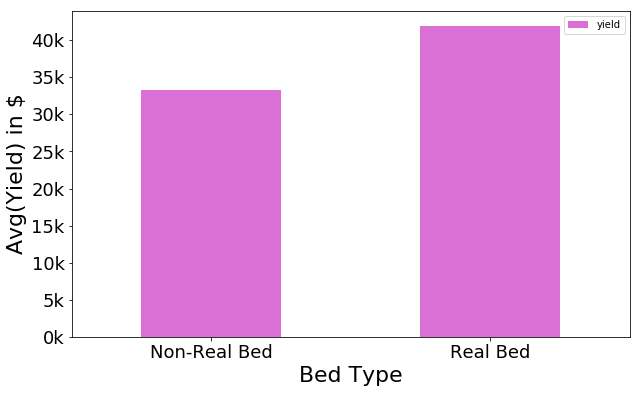

In [103]:
plt.figure(figsize=(10, 6))
plot = df_airbnb_yield.\
    groupby('bed_type', as_index=False)['yield'].\
    mean().sort_values(by=['yield']).\
    plot.bar(x='bed_type', rot=0,color='orchid')
fig = plot.get_figure()
fig.set_size_inches(10, 6)
ax = fig.add_subplot(111)
def y_fmt(x, y):
    x = int(x)//1000
    return '{}k'.format(x)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.xlabel('Bed Type',fontsize=22)
plt.ylabel('Avg(Yield) in $', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fig.savefig("bed_type.png")

<Figure size 720x432 with 0 Axes>

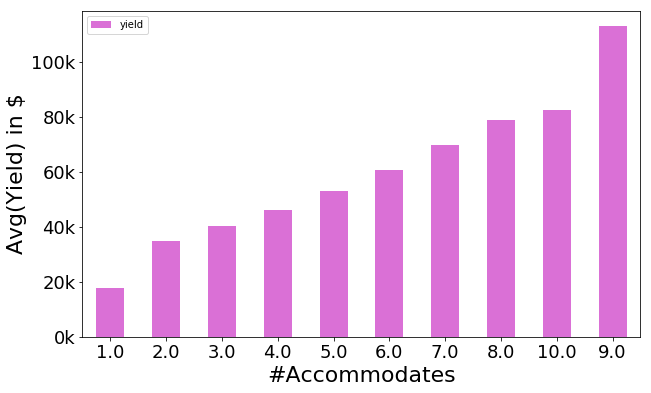

In [104]:
plt.figure(figsize=(10, 6))
plot = df_airbnb_yield.\
    groupby('accommodates', as_index=False)['yield'].\
    mean().sort_values(by=['yield']).\
    plot.bar(x='accommodates', rot=0,color='orchid')
fig = plot.get_figure()
fig.set_size_inches(10, 6)
ax = fig.add_subplot(111)
def y_fmt(x, y):
    x = int(x)//1000
    return '{}k'.format(x)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.xlabel('#Accommodates',fontsize=22)
plt.ylabel('Avg(Yield) in $', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fig.savefig("accommodates.png")

<Figure size 720x432 with 0 Axes>

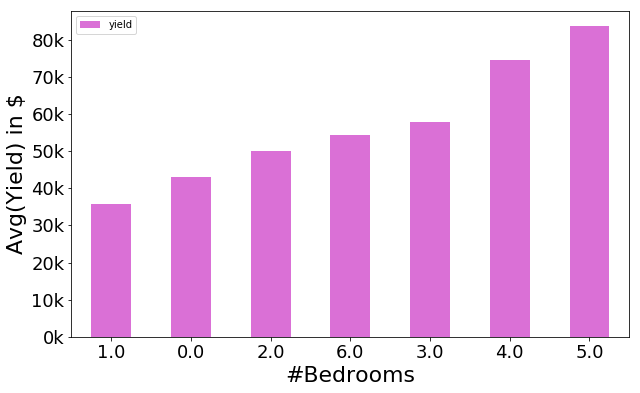

In [105]:
plt.figure(figsize=(10, 6))
plot = df_airbnb_yield.\
    groupby('bedrooms', as_index=False)['yield'].\
    mean().sort_values(by=['yield']).\
    plot.bar(x='bedrooms', rot=0,color='orchid')
fig = plot.get_figure()
fig.set_size_inches(10, 6)
ax = fig.add_subplot(111)
def y_fmt(x, y):
    x = int(x)//1000
    return '{}k'.format(x)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.xlabel('#Bedrooms',fontsize=22)
plt.ylabel('Avg(Yield) in $', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fig.savefig("bedrooms.png")

<Figure size 720x432 with 0 Axes>

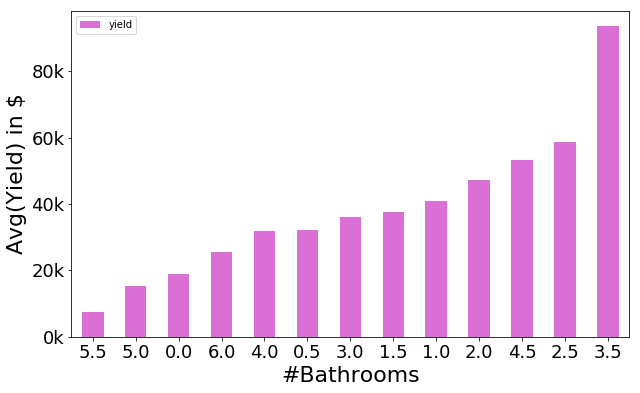

In [106]:
plt.figure(figsize=(10, 6))
plot = df_airbnb_yield.\
    groupby('bathrooms', as_index=False)['yield'].\
    mean().sort_values(by=['yield']).\
    plot.bar(x='bathrooms', rot=0,color='orchid')
fig = plot.get_figure()
fig.set_size_inches(10, 6)
ax = fig.add_subplot(111)
def y_fmt(x, y):
    x = int(x)//1000
    return '{}k'.format(x)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.xlabel('#Bathrooms',fontsize=22)
plt.ylabel('Avg(Yield) in $', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fig.savefig("bathrooms.png")

In [107]:
df_airbnb_yield

,description,property_type,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,extra_people,minimum_nights,reviews_per_month,bed_type,latitude,longitude,yield
0,Our bright garden unit overlooks a grassy back...,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,750.0,270.0,2.0,25.0,1.0,1.49,Real Bed,37.769310,-122.433856,28965.60
4,Pls email before booking. Interior featured i...,House,Entire home/apt,5.0,1.5,2.0,2.0,750.0,1010.0,2.0,150.0,7.0,0.24,Real Bed,37.775249,-122.436374,17452.80
5,"Fully furnished 2BR, 1BA flat in beautiful Vic...",Apartment,Entire home/apt,6.0,1.0,2.0,3.0,750.0,380.0,1.0,0.0,2.0,0.28,Real Bed,37.784707,-122.445554,7660.80
6,"Welcome to San Francisco's Mission District, t...",Condominium,Private room,3.0,1.0,1.0,2.0,750.0,189.0,2.0,60.0,1.0,5.50,Real Bed,37.759189,-122.422367,74844.00
18,Luna Rienne Gallery is very pleased to offer o...,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,750.0,295.0,2.0,35.0,3.0,0.90,Real Bed,37.754907,-122.422455,19116.00
19,Minimum stay: 6 months (not available for dail...,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,450.0,215.0,1.0,0.0,180.0,0.08,Real Bed,37.784689,-122.414562,1238.40
22,Welcome to the Lower Haight! My neighborhood a...,Other,Private room,2.0,1.0,1.0,1.0,750.0,140.0,1.0,0.0,3.0,4.10,Real Bed,37.772522,-122.432156,41328.00
31,"Comfortable, quiet guest room with own private...",Other,Private room,2.0,1.0,1.0,1.0,750.0,235.0,2.0,20.0,2.0,2.55,Real Bed,37.756446,-122.399102,43146.00
33,This one-bedroom space comes with a large bedr...,Other,Entire home/apt,4.0,1.0,1.0,2.0,750.0,215.0,4.0,20.0,5.0,2.54,Real Bed,37.787165,-122.433861,39319.20
36,Welcome to the Lower Haight! My neighborhood a...,Other,Private room,2.0,1.0,1.0,1.0,750.0,140.0,1.0,0.0,2.0,3.96,Real Bed,37.777289,-122.434211,39916.80


<Figure size 720x432 with 0 Axes>

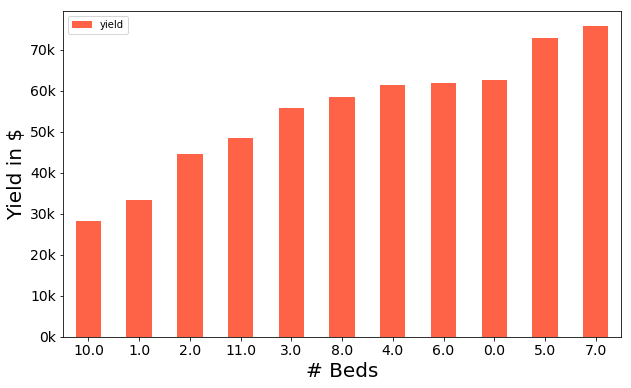

In [108]:

plt.figure(figsize=(10, 6))
plot = df_airbnb_yield.\
    groupby('beds', as_index=False)['yield'].\
    mean().sort_values(by=['yield']).\
    plot.bar(x='beds', rot=0,color='orchid')
fig = plot.get_figure()
fig.set_size_inches(10, 6)
plt.xlabel('# Beds',fontsize=20)
plt.ylabel('Yield in $', fontsize=20)
plt.xticks(fontsize=14)
ax = fig.add_subplot(111)
def y_fmt(x, y):
    x = int(x)//1000
    return '{}k'.format(x)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
plt.yticks(fontsize=14)
fig.savefig("beds.png")

In [109]:
df_airbnb_yield.head(1)

,description,property_type,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,extra_people,minimum_nights,reviews_per_month,bed_type,latitude,longitude,yield
0,Our bright garden unit overlooks a grassy back...,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,750.0,270.0,2.0,25.0,1.0,1.49,Real Bed,37.76931,-122.433856,28965.6


In [110]:
df_airbnb_yield.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25125 entries, 0 to 76423
Data columns (total 17 columns):
description          25125 non-null object
property_type        25125 non-null object
room_type            25125 non-null object
accommodates         25125 non-null float64
bathrooms            25125 non-null float64
bedrooms             25125 non-null float64
beds                 25125 non-null float64
square_feet          25125 non-null float64
price                25125 non-null float64
guests_included      25125 non-null float64
extra_people         25125 non-null float64
minimum_nights       25125 non-null float64
reviews_per_month    25125 non-null float64
bed_type             25125 non-null object
latitude             25125 non-null float64
longitude            25125 non-null float64
yield                25125 non-null float64
dtypes: float64(13), object(4)
memory usage: 3.5+ MB


In [111]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [112]:
df_airbnb_yield.head(2)

,description,property_type,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,extra_people,minimum_nights,reviews_per_month,bed_type,latitude,longitude,yield
0,Our bright garden unit overlooks a grassy back...,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,750.0,270.0,2.0,25.0,1.0,1.49,Real Bed,37.769310,-122.433856,28965.6
4,Pls email before booking. Interior featured i...,House,Entire home/apt,5.0,1.5,2.0,2.0,750.0,1010.0,2.0,150.0,7.0,0.24,Real Bed,37.775249,-122.436374,17452.8


In [113]:
# Remove missing yield values
df_airbnb_yield = df_airbnb_yield.dropna(subset=['yield'])

In [114]:
# Remove square_feet as it is too sparse.
# df_airbnb_clean = df_airbnb_yield.drop('square_feet', axis=1)


In [115]:

# Impute most frequent for categorical features
categorical_feats = df_airbnb_yield.select_dtypes(include=['object']).columns
df_airbnb_yield[categorical_feats] = DataFrameImputer().fit_transform(df_airbnb_yield[categorical_feats])



In [116]:
# Impute median for numerical features
num_feats = df_airbnb_yield.select_dtypes(include=[np.number]).columns
imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
df_airbnb_yield[num_feats] = imp.fit_transform(df_airbnb_yield[num_feats])

print("Dataset has {} rows, {} columns.".format(*df_airbnb_yield.shape))

Dataset has 25125 rows, 17 columns.


In [117]:
df_airbnb_yield.isnull().values.any()

False

In [118]:
# df_airbnb_yield.to_pickle("./df_airbnb_cleaned.pkl")

In [119]:
# df_airbnb_yield.to_csv("./airbnb28.csv")